# Import and Prepare the Data

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns 
%matplotlib inline

# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
credit = pd.read_csv("default of credit card clients.csv")

In [11]:
# Check the first 5 rows of the data frame
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Check the last 5 rows of the data frame
credit.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [4]:
# Column names
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
credit.shape

(30000, 25)

In [6]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

# Data Preprocessing 
## Data Cleaning
### How to remove duplicates

In [9]:
credit.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
29970    False
29971    False
29972    False
29973    False
29974    False
29975    False
29976    False
29977    False
29978    False
29979    False
29980    False
29981    False
29982    False
29983    False
29984    False
29985    False
29986    False
29987    False
29988    False
29989    False
29990    False
29991    False
29992    False
29993    False
29994    False
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [11]:
credit.drop_duplicates(subset=None, keep= False, inplace = True)

In [12]:
credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


## Data Transformation
### How to deal with missing data

In [12]:
import numpy as np
credit.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Get the total number of missing values
credit.isnull().sum().sum()

0

## Data Discretization
### Binning the age attribute

In [23]:
# Define bins as 20-30,30-40, 40-50, 50-60, 60-70, 70-80
bins = [20, 30, 40, 50, 60, 70, 80]
# Names for the groups
group_names = ['1', '2', '3', '4', '5', '6']
credit['Age Group']=pd.cut(credit.AGE, bins, labels=group_names)
credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Credit Group,Age Group
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,2,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,1
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,2,2
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,2,2
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,2,4
5,6,50000,1,1,2,37,0,0,0,0,...,20024,2500,1815,657,1000,1000,800,0,2,2
6,7,500000,1,1,2,29,0,0,0,0,...,473944,55000,40000,38000,20239,13750,13770,0,6,1
7,8,100000,2,2,2,23,0,-1,-1,0,...,567,380,601,0,581,1687,1542,0,2,1
8,9,140000,2,3,1,28,0,0,2,0,...,3719,3329,0,432,1000,1000,1000,0,3,1
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,13912,0,0,0,13007,1122,0,0,2,2


### Binning the amount of given credit

In [16]:
# Define bins as 10000-100000, 100000-200000, 200000-300000, 300000-400000, 400000-500000, 500000-600000, 600000-700000
bins = [1, 10000, 100000, 200000, 300000, 400000, 500000, 600000, 700000]
# Names for the groups
group_names = ['1', '2', '3', '4', '5', '6', '7', '8']
credit['Credit Group']=pd.cut(credit.LIMIT_BAL, bins, labels=group_names)
credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Credit Group
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,2
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,3
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,2
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,2
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,2
5,6,50000,1,1,2,37,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,2
6,7,500000,1,1,2,29,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,6
7,8,100000,2,2,2,23,0,-1,-1,0,...,-159,567,380,601,0,581,1687,1542,0,2
8,9,140000,2,3,1,28,0,0,2,0,...,11793,3719,3329,0,432,1000,1000,1000,0,3
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,13007,13912,0,0,0,13007,1122,0,0,2


# Visualizing the Data

## Histograms

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


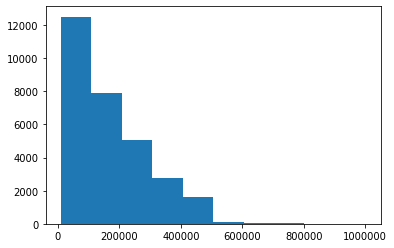

In [16]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

### specify the number of bins in histograms by adding bins='X' as follows:

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

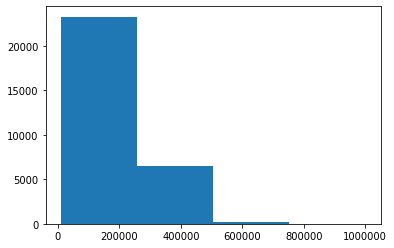

In [17]:
plt.hist(credit['LIMIT_BAL'], bins=4)

## Line Plot

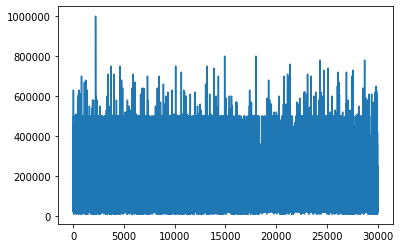

In [18]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

## Scatter Plot

In [70]:
x = credit['PAY_0']
y = credit['PAY_2']

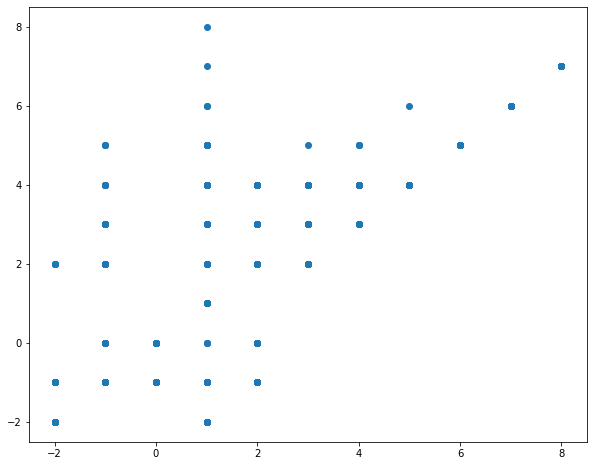

In [71]:
plt.scatter(x,y)
plt.show()

## Box Plot

In [21]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


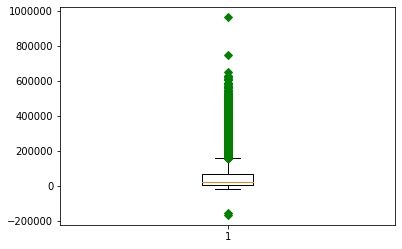

In [22]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

## Data Reduction
### Correlation

In [83]:
cor = credit.corr()
print(corrMat)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

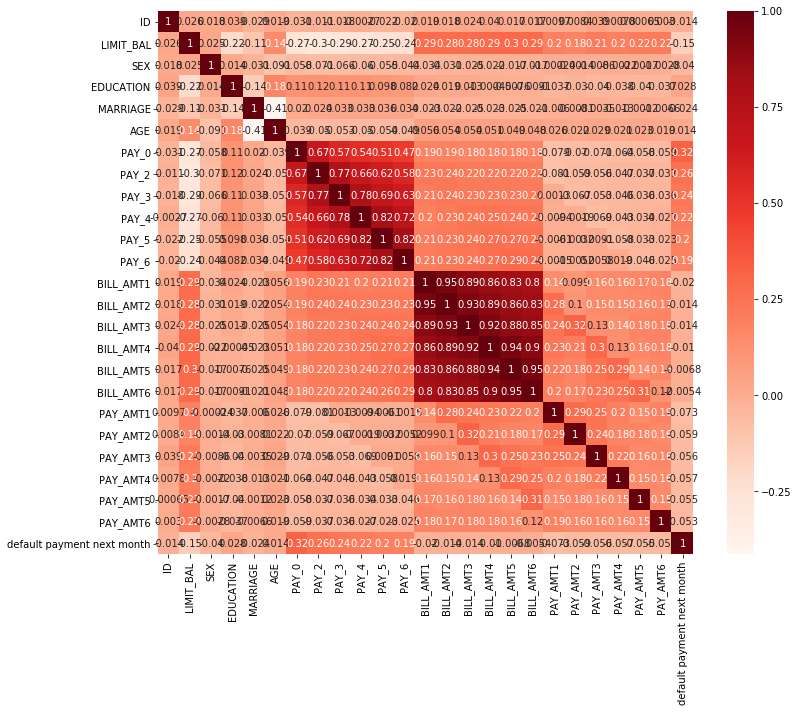

In [81]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = credit.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### How to remove highly correlated features

In [82]:
#Correlation with output variable
cor_target = abs(cor["default payment next month"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

default payment next month    1.0
Name: default payment next month, dtype: float64

## Dimensionality Reduction
### Principle Component Analysis

### Covariance

In [24]:
cov = credit.cov()
print(cov)

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_A

In [4]:
# X is feature vectors
X = credit.drop(['default payment next month', 'ID'], axis=1)

In [6]:
Y = credit[['default payment next month']]

In [7]:
X.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [8]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [9]:
# features are columns from x_std
features = X_std.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.00003333e+00  2.47560603e-02 -2.19168004e-01 -1.08143015e-01
   1.44717621e-01 -2.71223373e-01 -2.96391981e-01 -2.86132492e-01
  -2.67468925e-01 -2.49419709e-01 -2.35203240e-01  2.85439380e-01
   2.78323641e-01  2.83245225e-01  2.93997424e-01  2.95572190e-01
   2.90398631e-01  1.95242423e-01  1.78413901e-01  2.10173754e-01
   2.03249185e-01  2.17209673e-01  2.19602689e-01]
 [ 2.47560603e-02  1.00003333e+00  1.42324106e-02 -3.13898864e-02
  -9.08766757e-02 -5.76448004e-02 -7.07733623e-02 -6.60982597e-02
  -6.01752442e-02 -5.50657206e-02 -4.40092552e-02 -3.36429910e-02
  -3.11845117e-02 -2.45641305e-02 -2.18804084e-02 -1.70057470e-02
  -1.67336841e-02 -2.42462645e-04 -1.39095602e-03 -8.59691148e-03
  -2.22904581e-03 -1.66721737e-03 -2.76611449e-03]
 [-2.19168004e-01  1.42324106e-02  1.00003333e+00 -1.43469123e-01
   1.75066497e-01  1.05367510e-01  1.21569605e-01  1.14028704e-01
   1.08797083e-01  9.75234114e-02  8.23187303e-02  2.35819668e-02
   1.87493958e-02  1.30028341e-02 -4.513

In [10]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [11]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[ 6.85184323e-02  3.16322879e-01 -1.74535217e-02  6.99836250e-02
   1.49540032e-01  3.75675621e-01 -1.06110107e-01 -5.92927064e-02
   2.14534998e-02  1.74808980e-02  8.49029043e-03 -9.90655244e-02
  -3.59222011e-01  7.54104442e-01 -2.38705689e-02  4.25879760e-02
   2.49023375e-02 -6.17362036e-03 -6.97055327e-03  9.89744818e-03
  -1.45249493e-02 -2.78456231e-03  6.61800394e-04]
 [-2.16564559e-02  3.05947306e-02 -2.40375133e-02 -7.82304989e-02
  -8.84073129e-01  3.95388429e-01 -6.50935886e-02 -2.76964593e-02
   1.89966890e-02  2.42623803e-02 -9.19738651e-03  5.61125462e-02
  -1.75896628e-01 -1.12999216e-01  2.47273034e-02 -2.03274646e-04
  -2.12138398e-02  3.68984835e-03  2.02451207e-03 -1.82538411e-03
   6.65806470e-04 -8.63429707e-04  7.97633996e-04]
 [ 1.92056117e-02 -9.15225417e-02  3.16425804e-01  2.46584589e-01
  -3.64899185e-01 -5.65257290e-01  3.99833412e-01  8.09262751e-02
  -1.54520199e-01  6.28946221e-02  3.95374746e-04 -1.85027563e-01
  -8.50715772e-02  3.72633

In [12]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[6.54330745 4.09846452 1.55101233 1.4723145  1.02527213 0.95723146
 0.9076182  0.88764591 0.87127841 0.78295576 0.73281262 0.68284393
 0.57096763 0.52440738 0.40365398 0.25989565 0.24913679 0.18869729
 0.13179069 0.07015803 0.04078596 0.02322001 0.02529607]


In [14]:
eig_vals[0] / sum(eig_vals)

0.28448214525610405

In [13]:
eig_vals[1] / sum(eig_vals)

0.17818816985305966

In [17]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(X_std)

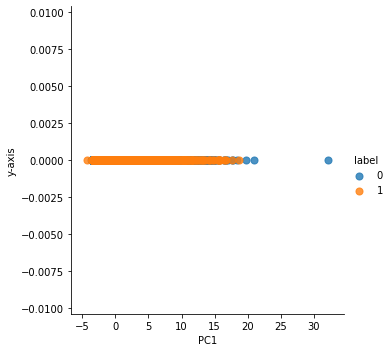

In [18]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

In [19]:
# Number of males and females of the clients
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

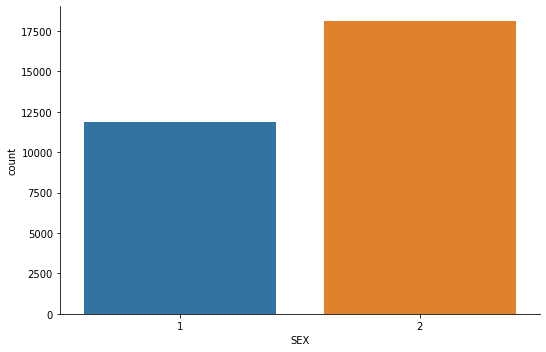

In [27]:
# Instead of a group by, use seaborn to plot the number of males and females
sns.catplot('SEX', data=credit, kind='count', aspect=1.5)

In [22]:
# Number of Clients in different education level
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

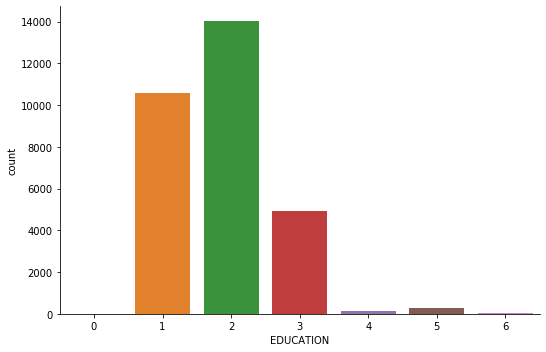

In [23]:
# Instead of a group by, use seaborn to plot the number of clients in different education level
sns.factorplot('EDUCATION', data=credit, kind='count', aspect=1.5)

In [24]:
# Number of clients in different marital status
credit.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

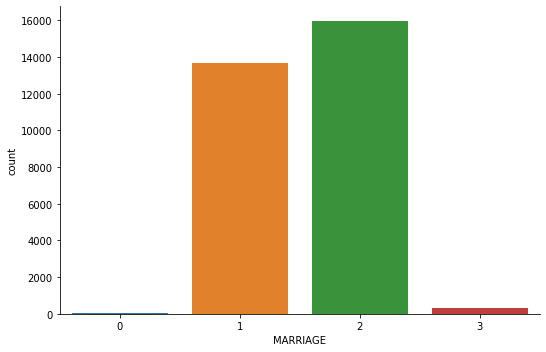

In [25]:
# Instead of a group by, use seaborn to plot the number of clients in different marital status
sns.factorplot('MARRIAGE', data=credit, kind='count', aspect=1.5)

In [37]:
# Number of clients in different age group
credit.groupby('Age Group')['Age Group'].count()

Age Group
1    11013
2    10713
3     6005
4     1997
5      257
6       15
Name: Age Group, dtype: int64

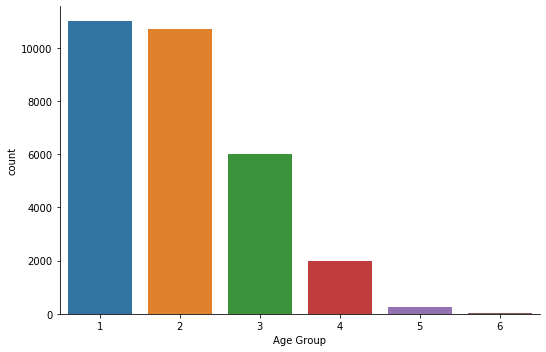

In [38]:
# Instead of a group by, use seaborn to plot the number of clients in different age group
sns.factorplot('Age Group', data=credit, kind='count', aspect=1.5)

In [17]:
# Number of clients in different credit group
credit.groupby('Credit Group')['Credit Group'].count()

Credit Group
1      493
2    12005
3     7880
4     5059
5     2759
6     1598
7      127
8       56
Name: Credit Group, dtype: int64

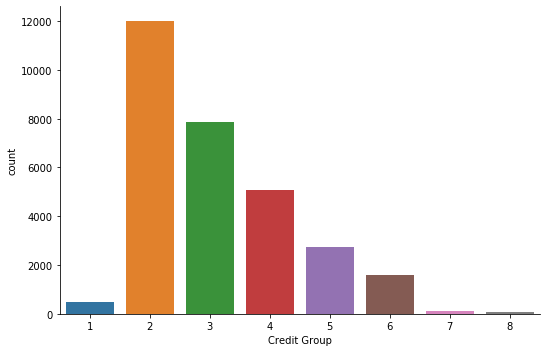

In [19]:
# Instead of a group by, use seaborn to plot the number of clients in different credit group
sns.catplot('Credit Group', data=credit, kind='count', aspect=1.5)

In [28]:
# Number of clients who defaulted on loan vs. who didn't
credit.groupby('default payment next month')['default payment next month'].count()

default payment next month
0    23364
1     6636
Name: default payment next month, dtype: int64

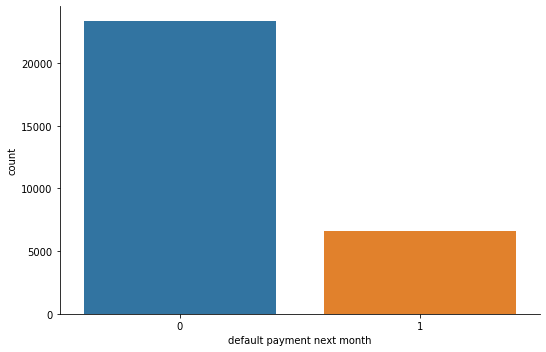

In [29]:
# Instead of a group by, use seaborn to plot the number of clients who defaulted on loans vs. who didn't
sns.factorplot('default payment next month', data=credit, kind='count', aspect=1.5)

In [31]:
not_defaulted = credit[credit['default payment next month']==0]

In [32]:
# Total number of clients who did not default on loans
len(not_defaulted)

23364

In [33]:
# Number of clients who defaulted in each education level grouped by sex. Also total was found for each education grouped by sex.
credit.pivot_table('default payment next month', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,0,1,2,3,4,5,6,All
SEX,,,,,,,,
1,0,906,1408,545,4,6,4,2873
2,0,1130,1922,692,3,12,4,3763
All,0,2036,3330,1237,7,18,8,6636


In [36]:
# Number of clients who defaulted in different marital status grouped by sex. Also total was found for each marital status grouped by sex.
credit.pivot_table('default payment next month', 'SEX', 'MARRIAGE', aggfunc=np.sum, margins=True)

MARRIAGE,0,1,2,3,All
SEX,,,,,
1,2,1346,1485,40,2873
2,3,1860,1856,44,3763
All,5,3206,3341,84,6636


In [39]:
# Number of clients who defaulted in different age group grouped by sex. Also total was found for each age group grouped by sex.
credit.pivot_table('default payment next month', 'SEX', 'Age Group', aggfunc=np.sum,margins=True)

Age Group,1,2,3,4,5,6,All
SEX,,,,,,,
1,913,1013,648,261,35,3,2873
2,1558,1176,751,243,33,2,3763
All,2471,2189,504,1399,68,5,6636


In [20]:
# Number of Clients who defaulted vs did not default in different credit group.
credit.groupby(['default payment next month', 'Credit Group'])['default payment next month'].count()

default payment next month  Credit Group
0                           1                296
                            2               8518
                            3               6345
                            4               4247
                            5               2371
                            6               1404
                            7                110
                            8                 53
1                           1                197
                            2               3487
                            3               1535
                            4                812
                            5                388
                            6                194
                            7                 17
                            8                  3
Name: default payment next month, dtype: int64

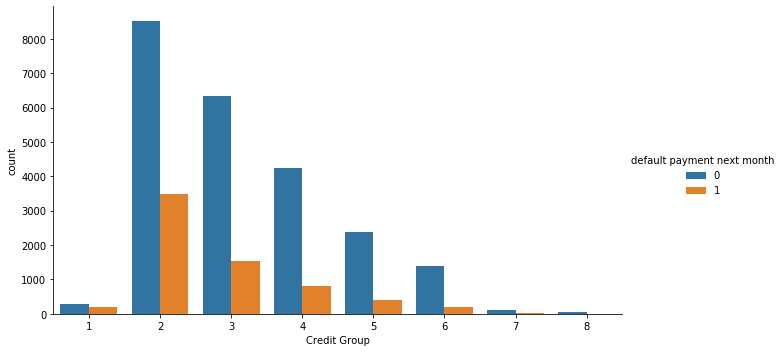

In [21]:
# Again use saeborn to group by default and credit group
g = sns.factorplot('Credit Group', data=credit, hue='default payment next month', kind='count', aspect=1.75)
g.set_xlabels('Credit Group')

In [21]:
# Number of Clients who defaulted vs did not default in different marital status.
credit.groupby(['default payment next month', 'MARRIAGE'])['default payment next month'].count()

default payment next month  MARRIAGE
0                           0              49
                            1           10453
                            2           12623
                            3             239
1                           0               5
                            1            3206
                            2            3341
                            3              84
Name: default payment next month, dtype: int64

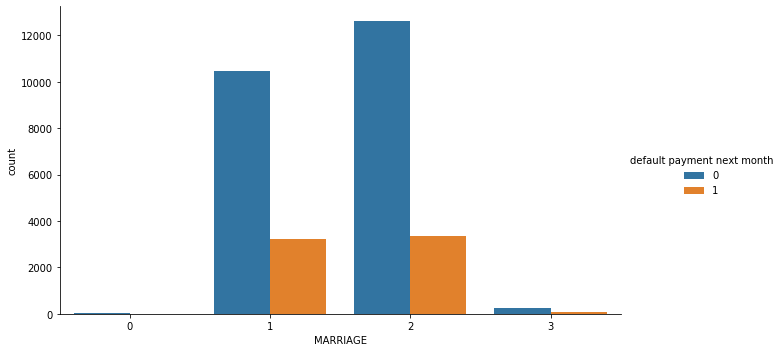

In [22]:
# Again use saeborn to group by default and marital status
g = sns.factorplot('MARRIAGE', data=credit, hue='default payment next month', kind='count', aspect=1.75)
g.set_xlabels('MARRIAGE')

#### The higher given credit is, the less chances that the customer would default.

In [41]:
print('Average and median age of clients are %0.f and %0.f years old, respectively'%(credit.AGE.mean(), 
                                                                          credit.AGE.median()))

Average and median age of clients are 35 and 34 years old, respectively


In [42]:
credit.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, "Distribution of Clients' Ages")

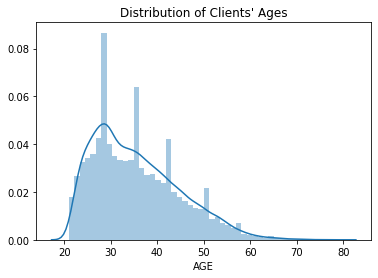

In [45]:
# Distribution of age, with an overlay of a density plot
age=credit['AGE']
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Clients' Ages")

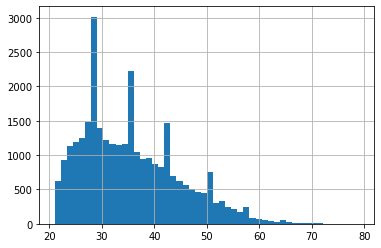

In [46]:
# Another way to plot a histogram of ages is shown below
credit['AGE'].hist(bins=50)

In [24]:
# Number of Clients who defaulted vs did not default in different age group.
credit.groupby(['default payment next month', 'Age Group'])['default payment next month'].count()

default payment next month  Age Group
0                           1            8542
                            2            8524
                            3            4606
                            4            1493
                            5             189
                            6              10
1                           1            2471
                            2            2189
                            3            1399
                            4             504
                            5              68
                            6               5
Name: default payment next month, dtype: int64

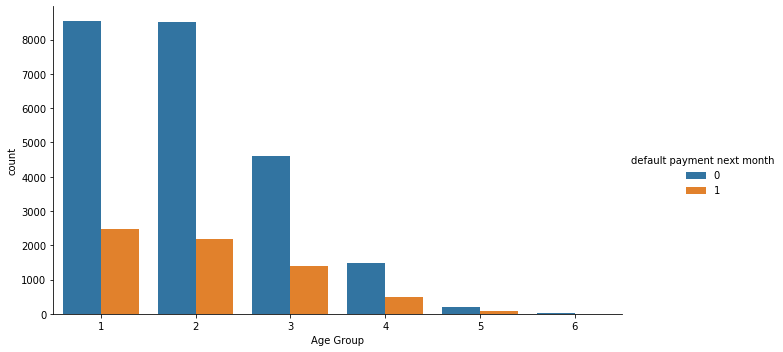

In [25]:
# Again use saeborn to group by default and credit group
g = sns.factorplot('Age Group', data=credit, hue='default payment next month', kind='count', aspect=1.75)
g.set_xlabels('Age Group')

In [19]:
# Number of Clients who defaulted vs did not default in different education
credit.groupby(['default payment next month', 'EDUCATION'])['default payment next month'].count()

default payment next month  EDUCATION
0                           0               14
                            1             8549
                            2            10700
                            3             3680
                            4              116
                            5              262
                            6               43
1                           1             2036
                            2             3330
                            3             1237
                            4                7
                            5               18
                            6                8
Name: default payment next month, dtype: int64

C:\Users\xixi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


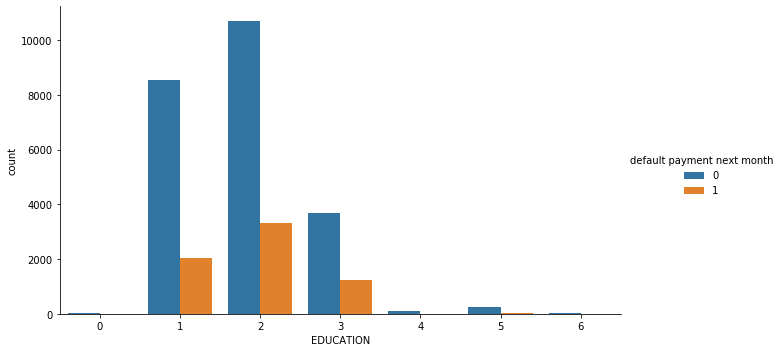

In [20]:
# Again use saeborn to group by default and education
g = sns.factorplot('EDUCATION', data=credit, hue='default payment next month', kind='count', aspect=1.75)
g.set_xlabels('EDUCATION')

#### Customer with lower education would have more chances to default.

In [28]:
# Number of Clients who defaulted vs did not default in different repay status
credit.groupby(['default payment next month', 'PAY_0'])['default payment next month'].count()

default payment next month  PAY_0
0                           -2        2394
                            -1        4732
                             0       12849
                             1        2436
                             2         823
                             3          78
                             4          24
                             5          13
                             6           5
                             7           2
                             8           8
1                           -2         365
                            -1         954
                             0        1888
                             1        1252
                             2        1844
                             3         244
                             4          52
                             5          13
                             6           6
                             7           7
                             8          11
Name: default paymen

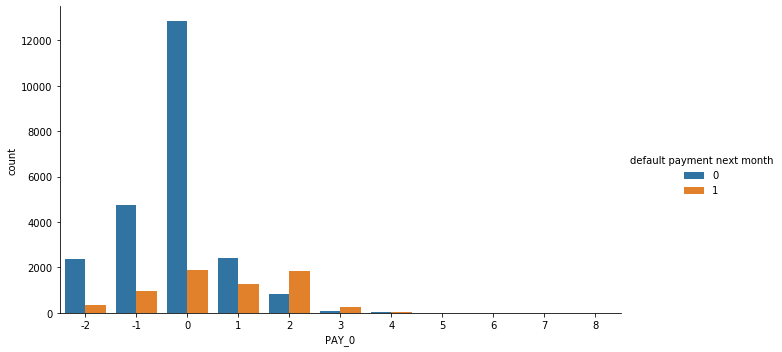

In [29]:
# Again use saeborn to group by default and credit group
g = sns.factorplot('PAY_0', data=credit, hue='default payment next month', kind='count', aspect=1.75)
g.set_xlabels('PAY_0')

#### Customers either have no consumption or use revolving credit to repay their loans each month would have the lowest chances of default.

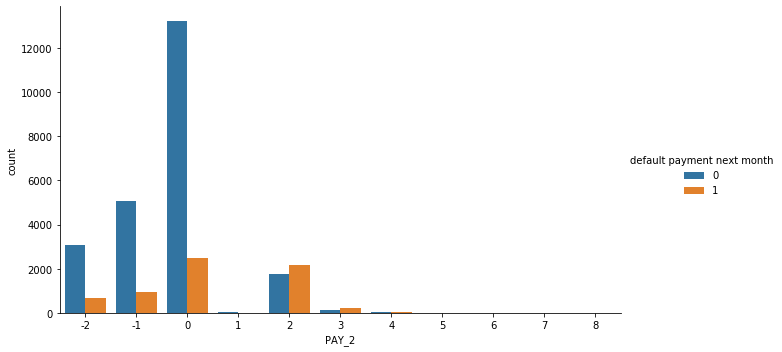

In [30]:
# Again use saeborn to group by default and credit group
g = sns.factorplot('PAY_2', data=credit, hue='default payment next month', kind='count', aspect=1.75)
g.set_xlabels('PAY_2')

In [51]:
x = credit['BILL_AMT1']
y = credit['BILL_AMT2']

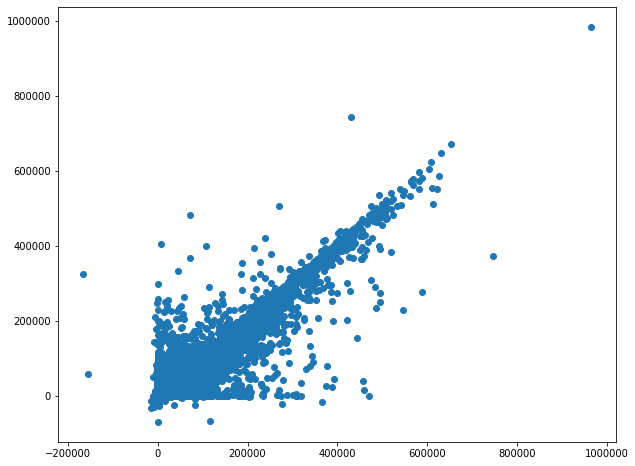

In [52]:
plt.scatter(x,y)
plt.show()

In [55]:
x = credit['PAY_AMT1']
y = credit['PAY_AMT2']

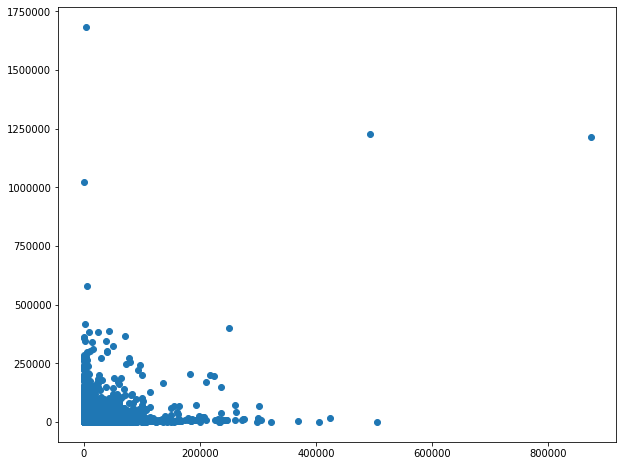

In [56]:
plt.scatter(x,y)
plt.show()

In [66]:
x = credit['BILL_AMT1']
y = credit['PAY_AMT1']

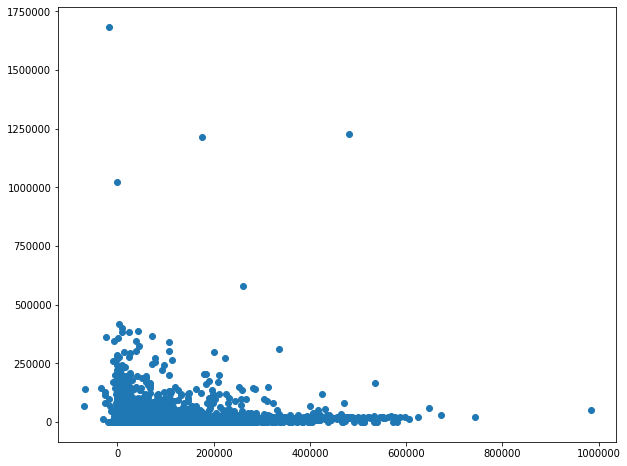

In [67]:
plt.scatter(x,y)
plt.show()

## Factor Affecting Default
### Age factor

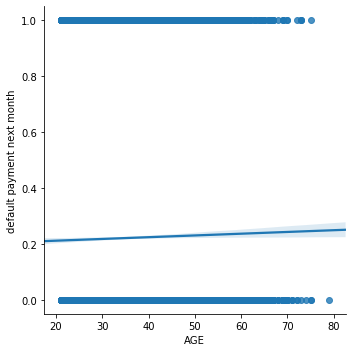

In [73]:
# Linear plot of age vs. default
sns.lmplot('AGE', 'default payment next month', data=credit)

#### There seems to be a general linear trend between age and the default. The plot shows that the older the passenger is, the better chance he/she would default on loans.

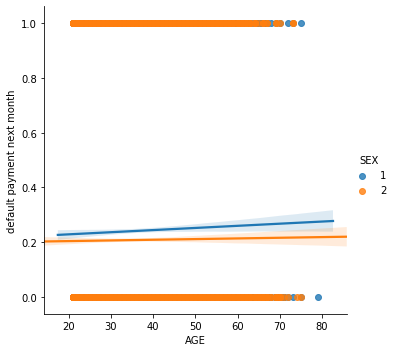

In [63]:
# Default vs. Age grouped by Sex
sns.lmplot('AGE', 'default payment next month', data=credit, hue='SEX')

#### Older men have higher rate of default than younger men as shown in the figure above. Also, older women has higher rate of default than younger women. Men have higher rate of default than women.

### Credit factor

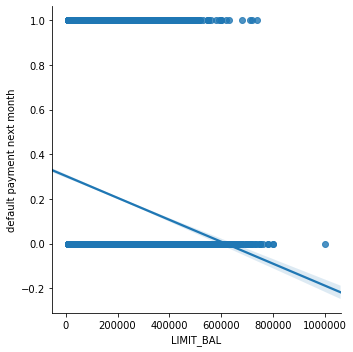

In [77]:
# Linear plot of credit vs. default
sns.lmplot('LIMIT_BAL', 'default payment next month', data=credit)

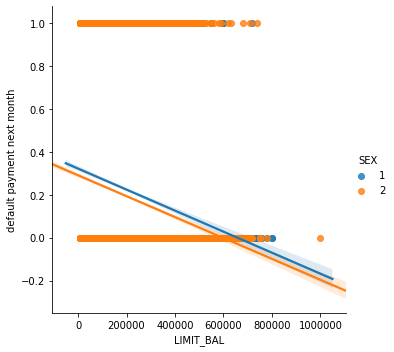

In [75]:
# Default vs. credit grouped by Sex
sns.lmplot('LIMIT_BAL', 'default payment next month', data=credit, hue='SEX')

#### Both men and women, the chances to default reduces when the amount of credit gets higher.